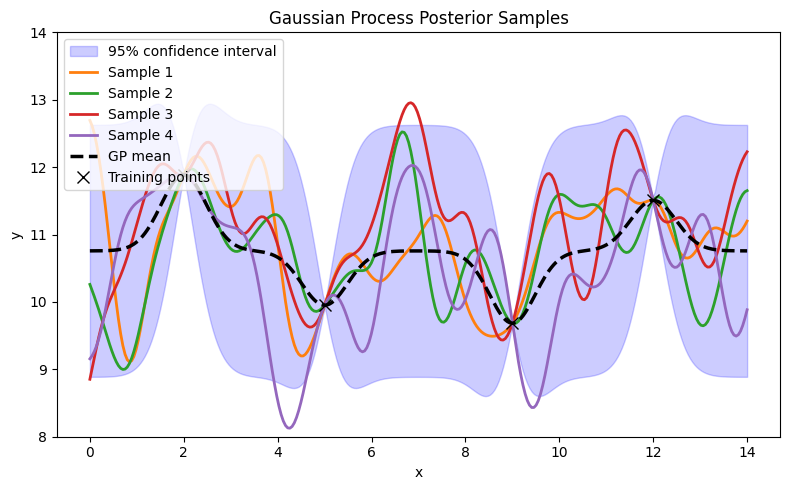

In [10]:
# GaussianProcess_demo

# This script demonstrates a simple 1D Gaussian Process with an RBF kernel,
# using scikit-learn. We:
#   - Define a smooth function f(x)
#   - Sample a few noise-free training points
#   - Fit a Gaussian Process model to interpolate them exactly
#   - Plot posterior samples from the GP, along with the posterior mean and
#     a 95% confidence interval.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def f(x):
    """A smooth function for demonstration."""
    return 10.0 + 0.02 * (x - 8)**2 + 1.2 * np.sin(x / 1.5)

# 1) Define noise-free training points
X_train = np.array([2.0, 5.0, 9.0, 12.0])[:, None]
y_train = f(X_train).ravel()

# 2) Set up a Gaussian Process with an RBF kernel, alpha=0 => exact interpolation
kernel = 1.0 * RBF(length_scale=3.0)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0, normalize_y=True)
gp.fit(X_train, y_train)

# 3) Sample from the GP at both train + test points
X_test = np.linspace(0, 14, 300)[:, None]
X_all = np.vstack([X_train, X_test])
y_all_samples = gp.sample_y(X_all, n_samples=4, random_state=None)

# 4) Compute posterior mean + std on the test grid
y_mean, y_std = gp.predict(X_test, return_std=True)

# Plotting
plt.figure(figsize=(8, 5))
plt.title("Gaussian Process Posterior Samples")

# (a) 95% confidence band
plt.fill_between(
    X_test.ravel(),
    y_mean - 1.96 * y_std,
    y_mean + 1.96 * y_std,
    color='blue', alpha=0.2,
    label='95% confidence interval'
)

# (b) Plot each sample path
colors = ['C1', 'C2', 'C3', 'C4']
for i in range(4):
    Xy = np.hstack([X_all, y_all_samples[:, i].reshape(-1, 1)])
    Xy_sorted = Xy[np.argsort(Xy[:, 0])]  # sort by x
    plt.plot(
        Xy_sorted[:, 0],
        Xy_sorted[:, 1],
        color=colors[i],
        lw=2,
        label=f'Sample {i+1}'
    )

# (c) Posterior mean as a dashed black line
plt.plot(
    X_test, y_mean,
    'k--', lw=2.5,
    label='GP mean'
)

# (d) Training points
plt.plot(
    X_train, y_train,
    'kx', markersize=8,
    label='Training points'
)

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([8, 14])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
